<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [440]:
#Importation de la librairie Pandas
import pandas as pd

In [441]:
#Importation de la librairie plotly express
import plotly as py

In [442]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [443]:
#Importation du fichier web.xlsx
chemin_fichier_web = r'C:\Users\yenbh\OneDrive\Desktop\Data Analyst\Supply Chain Open classroom\Projet 6 Optimisez la gestion du stock d’une boutique en nettoyant ses données\web.xlsx'
df_web = pd.read_excel(chemin_fichier_web)

#Importation du fichier erp.xlsx
chemin_fichier_erp = r'C:\Users\yenbh\OneDrive\Desktop\Data Analyst\Supply Chain Open classroom\Projet 6 Optimisez la gestion du stock d’une boutique en nettoyant ses données\erp.xlsx'
df_erp = pd.read_excel(chemin_fichier_erp)

#importation du fichier liaison.xlsx
chemin_fichier_liaison = r'C:\Users\yenbh\OneDrive\Desktop\Data Analyst\Supply Chain Open classroom\Projet 6 Optimisez la gestion du stock d’une boutique en nettoyant ses données\liaison.xlsx'
df_liaison = pd.read_excel(chemin_fichier_liaison)

c:\Users\yenbh\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed

c:\Users\yenbh\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed

c:\Users\yenbh\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed



<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements du fichiers csv</h3>
</div>

In [444]:
#Avant d'utiliser pandas pour le chargement du fichier, explorons la structure du fichier
#Pour cela utilisons l'instruction ci-dessous qui permet d'ouvrir un fichier texte
with open("caracteristiques_vins.csv", "rb") as f:
    file = f.read()
    
#Et affichons le:
print(file)

b"post_name;poids;R\xe9gion;Domaine;Appellation;Couleur;C\xe9page;Mill\xe9sime;Garde;Contenance;Degr\xe9 d'alcool;Temp\xe9rature d\xe9gustation;Alliance mets\r\npierre-jean-villa-saint-joseph-preface-2018;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Saint Joseph;Rouge;100% Syrah;2020;4-7 ans;75cl;13%;15\xb0C;Charcuterie, Lapin, Viande rouge, Volaille\r\npierre-jean-villa-saint-joseph-tilde-2017;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Saint Joseph;Rouge;100% Syrah;2019;6-8 ans;75cl;13%;15\xb0C;Charcuterie, Viande rouge, Volaille\r\npierre-jean-villa-croze-hermitage-accroche-coeur-2018;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Crozes-Hermitage;Rouge;100% Syrah;2020;3-5 ans;75cl;13%;15\xb0C;Viande rouge, Volaille\r\npierre-jean-villa-igp-gamine-2018;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Collines Rhodaniennes;Rouge;100% Syrah;2020;3-5 ans;75cl;13%;14\xb0C;Charcuterie, Viande rouge, Volaille\r\npierre-jean-villa-cote-rotie-carmina-2017;1.5 kg;Rh\xf4ne;Pierre Jean Villa;C\xf4te R\xf4tie;Rouge;100% Syrah;2019;10-20 ans;7

In [445]:
#Vous avez dû constater que les champs sont séparées par des point-virgule
chemin_fichier_caracteristiques = r'C:\Users\yenbh\OneDrive\Desktop\Data Analyst\Supply Chain Open classroom\Projet 6 Optimisez la gestion du stock d’une boutique en nettoyant ses données\caracteristiques_vins.csv'

#tentons d'ouvrir le fichier avec pandas avec cet élément
df_caracteristiques = pd.read_csv(chemin_fichier_caracteristiques, sep=";", encoding='ISO-8859-1')

df_caracteristiques.head()

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
0,pierre-jean-villa-saint-joseph-preface-2018,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2020.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille"
1,pierre-jean-villa-saint-joseph-tilde-2017,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2019.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille"
2,pierre-jean-villa-croze-hermitage-accroche-coe...,1.5 kg,Rhône,Pierre Jean Villa,Crozes-Hermitage,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,15°C,"Viande rouge, Volaille"
3,pierre-jean-villa-igp-gamine-2018,1.5 kg,Rhône,Pierre Jean Villa,Collines Rhodaniennes,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,14°C,"Charcuterie, Viande rouge, Volaille"
4,pierre-jean-villa-cote-rotie-carmina-2017,1.5 kg,Rhône,Pierre Jean Villa,Côte Rôtie,Rouge,100% Syrah,2019.0,10-20 ans,75cl,13%,17°C,"Gibier, Viande rouge"


In [446]:
#Importation de la bibilothèque 
#(à noter que c'est une mauvaise pratique d'importer une bibliothèque au milieu d'un programme)
#(celle-ci doit toujours figurer au début du script)
import chardet

Rendez-vous sur le lien ci-après pour identifier l'instruction dont vous aurez besoin:<br>
https://chardet.readthedocs.io/en/latest/usage.html#basic-usage

In [447]:
#Identification de l'encodage du fichier
def detect_encoding(file_path):
    with open(file_path, 'rb') as file:
        result = chardet.detect(file.read())
    return result['encoding']

# Chemin du fichier CSV
file_path = r'C:\Users\yenbh\OneDrive\Desktop\Data Analyst\Supply Chain Open classroom\Projet 6 Optimisez la gestion du stock d’une boutique en nettoyant ses données\caracteristiques_vins.csv'

# Détecter l'encodage du fichier
detected_encoding = detect_encoding(file_path)

if detected_encoding:
    print(f"Encodage détecté : {detected_encoding}")
    
    # Utiliser cet encodage pour lire le fichier avec pandas
    df_caracteristiques = pd.read_csv(file_path, sep=";", encoding=detected_encoding)
    
    # Afficher les premières lignes du DataFrame pour vérification
    print(df_caracteristiques.head())
    
else:
    print("Impossible de détecter l'encodage.")

Encodage détecté : Windows-1252
                                           post_name   poids Région  \
0        pierre-jean-villa-saint-joseph-preface-2018  1.5 kg  Rhône   
1          pierre-jean-villa-saint-joseph-tilde-2017  1.5 kg  Rhône   
2  pierre-jean-villa-croze-hermitage-accroche-coe...  1.5 kg  Rhône   
3                  pierre-jean-villa-igp-gamine-2018  1.5 kg  Rhône   
4          pierre-jean-villa-cote-rotie-carmina-2017  1.5 kg  Rhône   

             Domaine            Appellation Couleur      Cépage  Millésime  \
0  Pierre Jean Villa           Saint Joseph   Rouge  100% Syrah     2020.0   
1  Pierre Jean Villa           Saint Joseph   Rouge  100% Syrah     2019.0   
2  Pierre Jean Villa       Crozes-Hermitage   Rouge  100% Syrah     2020.0   
3  Pierre Jean Villa  Collines Rhodaniennes   Rouge  100% Syrah     2020.0   
4  Pierre Jean Villa             Côte Rôtie   Rouge  100% Syrah     2019.0   

       Garde Contenance Degré d'alcool Température dégustation  \
0    4

In [448]:
#A présent que nous connaissons les séparateurs et l'encodage du fichier
#Utilisons Pandas pour charger le fichier
#Je vous laisse le soin de renseigner les champs manquants
nom_du_fichier = "caracteristiques_vins.csv"
type_de_separateur = ";"
encodage_du_fichier_csv = "Windows-1252"

df_caracteristiques = pd.read_csv(nom_du_fichier, sep=type_de_separateur, encoding=encodage_du_fichier_csv)

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [449]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 5 colonne(s)


In [450]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

#La nature des données dans chacune des colonnes
print(df_erp.dtypes)

#Le nombre de valeurs présentes dans chacune des colonnes
print(df_erp.count())

Le tableau comporte 5 colonne(s)
product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object
product_id        825
onsale_web        825
price             825
stock_quantity    825
stock_status      825
dtype: int64


In [451]:
#Afficher les 5 premières lignes de la table
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [452]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
doublons_product_id = df_erp[df_erp.duplicated(subset='product_id', keep=False)]

if not doublons_product_id.empty:
    print("Les lignes en doublons dans la colonne 'product_id' sont :")
    print(doublons_product_id)
else:
    print("Aucune ligne en doublons dans la colonne 'product_id'.")

Aucune ligne en doublons dans la colonne 'product_id'.


In [453]:
#Afficher les valeurs distinctes de la colonne stock_status
valeurs_distinctes_stock_status = df_erp ['stock_status'].unique()
print ("les valeurs distinctes de la colonne stock_status : ", valeurs_distinctes_stock_status)

#À quelle(s) autre(s) colonne(s) sont-elles liées ?
# relations_categorielles = df_erp.groupby('stock_status').agg({'colonne1': 'product_id', 'colonne2': 'onsale_web', 'colonne3': 'price', 'colonne4': 'stock_quality'})

#print("Relations avec d'autres colonnes en fonction de 'stock_status' :")
#print(relations_categorielles)

table_contingence = pd.crosstab(df_erp['stock_status'], df_erp['stock_quantity'])

print("Table de contingence entre 'stock_status' et 'colonne1' :")
print(table_contingence)

from scipy.stats import chi2_contingency

chi2, p, _, _ = chi2_contingency(table_contingence)

print(f"Chi2 : {chi2}")
print(f"P-value : {p}")

les valeurs distinctes de la colonne stock_status :  ['outofstock' 'instock']
Table de contingence entre 'stock_status' et 'colonne1' :
stock_quantity  0    1    2    3    4    5    6    7    8    9    ...  209  \
stock_status                                                      ...        
instock           1   39   20   23   14   22   24   22   16   16  ...    1   
outofstock      187    0    0    0    0    0    0    0    0    0  ...    0   

stock_quantity  211  237  257  267  276  284  289  363  578  
stock_status                                                 
instock           1    1    1    1    1    1    1    1    1  
outofstock        0    0    0    0    0    0    0    0    0  

[2 rows x 128 columns]
Chi2 : 819.3254768892149
P-value : 1.0898130153796188e-101


In [454]:
#Création d'une colonne "stock_status_2
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"
df_erp['stock_status_2'] = df_erp['stock_quantity'].apply(lambda x: 'outofstock' if x == '0' else 'instock')

In [455]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

0      False
1      False
2      False
3      False
4      False
       ...  
820     True
821     True
822     True
823     True
824     True
Length: 825, dtype: bool

In [456]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset

somme_identiques = (df_erp["stock_status"] == df_erp["stock_status_2"]).sum()
print('Nombre de linges de stock identiques :',somme_identiques)

somme_non_identiques = (df_erp["stock_status"] != df_erp["stock_status_2"]).sum()
print('Nombre de linges de stock non-identiques :',somme_non_identiques)

Nombre de linges de stock identiques : 638
Nombre de linges de stock non-identiques : 187


In [457]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3

In [458]:
#Corriger la ou les données incohérentes



<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [459]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
#Afficher le ou les prix non renseignés dans la colonne "price"
print("Nombres d'article avec un prix non renseignés: {}".format(df_erp[df_erp['price'].isnull()])) #Saisir l'instruction manquante dans la fonction format
#Afficher le prix minimum de la colonne "price"
print('Le prix minimum de la colonne "price" est ', df_erp['price'].min())
#Afficher le prix maximum de la colonne "price"
print('Le prix maximum de la colonne "price" est ', df_erp['price'].max())

Nombres d'article avec un prix non renseignés: Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, stock_status_2]
Index: []
Le prix minimum de la colonne "price" est  5.2
Le prix maximum de la colonne "price" est  225.0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [460]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
print("Nombres d'article avec une quantité non renseignés: {}".format(df_erp[df_erp['stock_quantity'].isnull()]))
#Afficher la quantité minimum de la colonne "stock_quantity"
print('la quantité minimum de la colonne "stock_quantity" est ', df_erp['stock_quantity'].min())
#Afficher la quantité maximum de la colonne "stock_quantity"
print('la quantité maximum de la colonne "stock_quantity" est ', df_erp['stock_quantity'].max())

Nombres d'article avec une quantité non renseignés: Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, stock_status_2]
Index: []
la quantité minimum de la colonne "stock_quantity" est  0
la quantité maximum de la colonne "stock_quantity" est  578


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [461]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?
print(df_erp['onsale_web'].unique())

# cette colonne signifie si l'article est vendu en ligne ou non. 

[1 0]


In [462]:
#Quelles sont les colonnes à conserver selon vous?
# supprimer les lignes dont la valeur de la colonne onsale_web est 0 car ici on s'intéresse uniquement aux produits vendus en ligne. 

Valeur_supprimer = [0]
df_erp = df_erp[~df_erp['onsale_web'].isin(Valeur_supprimer)]

In [463]:
#Supprimer les colonnes comportant le libellé "stock_status"
#Cette colonne est redondante avec la colonne "stock_quantity". Dans notre projet cette information n'est pas utile.
df_erp = df_erp.drop(df_erp.filter(like='stock_status', axis=1).columns, axis=1)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>
 

In [464]:
#Dimension du dataset
#Nombre d'observations
print("Le tableau comporte {} observation(s) ou article(s)".format(df_web.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_web.shape[1]))
#Nombre de caractéristiques


Le tableau comporte 1513 observation(s) ou article(s)
Le tableau comporte 28 colonne(s)


In [465]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)".format(df_web.shape[1]))

#La nature des données dans chacune des colonnes
print(df_web.dtypes)

#Le nombre de valeurs présentes dans chacune des colonnes
#print(df_web.count())

df_web.describe()

Le tableau comporte 28 colonne(s)
sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_o

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_date,post_date_gmt,post_content,post_password,post_modified,post_modified_gmt,post_content_filtered,post_parent,menu_order,comment_count
count,1513.0,1513.0,1513.0,1430.0,1430.000000,0.0,1430.000000,1430,1430,0.0,0.0,1430,1430,0.0,1430.0,1430.0,1430.0
mean,0.0,0.0,0.0,0.0,4.006993,NaN,1.998601,2018-08-22 03:22:17.090908928,2018-08-22 01:53:30.097902080,NaN,NaN,2020-06-20 13:59:29.781818368,2020-06-20 12:06:02.509090816,NaN,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,NaN,2018-02-20 15:19:23,2018-02-20 14:19:23,NaN,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,2018-02-27 20:01:12.500000,2018-02-27 19:01:12.500000,NaN,NaN,2020-06-18 10:45:05.249999872,2020-06-18 08:45:05.249999872,NaN,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,2018-04-19 14:56:05,2018-04-19 12:56:05,NaN,NaN,2020-08-04 09:30:06,2020-08-04 07:30:06,NaN,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,2019-01-31 14:35:47,2019-01-31 13:35:47,NaN,NaN,2020-08-25 10:32:32,2020-08-25 08:32:32,NaN,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,2020-07-20 11:00:00,2020-07-20 09:00:00,NaN,NaN,2020-08-27 18:55:03,2020-08-27 16:55:03,NaN,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,8.510559,NaN,0.037385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [466]:
#Selon vous, quelles sont les colonnes à conserver ?
# colonnes ['SKU', 'total_sales', 'post_date','post_title', 'post_name','guid']



In [467]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
df_web = df_web.drop(['virtual', 'downloadable', 'rating_count', 'average_rating', 'tax_class', 'post_content', 'post_password', 'post_content_filtered', 'post_parent', 'menu_order', 'comment_count'], axis=1)


In [468]:
#Identifier les lignes sans code articles
df_lignes_sans_code_article = df_web[df_web['sku'].isnull()]

print("Les lignes sans code article sont les suivantes:")
print(df_lignes_sans_code_article)

Les lignes sans code article sont les suivantes:
     sku  total_sales tax_status  post_author post_date post_date_gmt  \
178  NaN          NaN        NaN          NaN       NaT           NaT   
179  NaN          NaN        NaN          NaN       NaT           NaT   
227  NaN          NaN        NaN          NaN       NaT           NaT   
230  NaN          NaN        NaN          NaN       NaT           NaT   
231  NaN          NaN        NaN          NaN       NaT           NaT   
..   ...          ...        ...          ...       ...           ...   
792  NaN          NaN        NaN          NaN       NaT           NaT   
793  NaN          NaN        NaN          NaN       NaT           NaT   
794  NaN          NaN        NaN          NaN       NaT           NaT   
795  NaN          NaN        NaN          NaN       NaT           NaT   
796  NaN          NaN        NaN          NaN       NaT           NaT   

    post_title post_excerpt post_status comment_status ping_status post_na

In [469]:
#Les lignes sans code article semble être toutes non renseignés
#Pour s'en assurer réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article

#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes
df_lignes_sans_code_article.describe()
#3 - Que constatez-vous?

,total_sales,post_author,post_date,post_date_gmt,post_modified,post_modified_gmt
count,2.0,2.0,2,2,2,2
mean,0.0,2.0,2018-08-04 11:45:33,2018-08-04 09:45:33,2019-11-02 13:24:08,2019-11-02 12:24:08
min,0.0,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,2019-11-02 13:24:01,2019-11-02 12:24:01
25%,0.0,2.0,2018-08-02 11:56:28,2018-08-02 09:56:28,2019-11-02 13:24:04.500000,2019-11-02 12:24:04.500000
50%,0.0,2.0,2018-08-04 11:45:33,2018-08-04 09:45:33,2019-11-02 13:24:08,2019-11-02 12:24:08
75%,0.0,2.0,2018-08-06 11:34:38,2018-08-06 09:34:38,2019-11-02 13:24:11.500000,2019-11-02 12:24:11.500000
max,0.0,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,2019-11-02 13:24:15,2019-11-02 12:24:15
std,0.0,0.0,NaN,NaN,NaN,NaN


In [470]:
df_web = df_web[~df_web['sku'].isnull()]

df_web.head()

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
0,bon-cadeau-25-euros,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
1,15298,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
2,15296,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
3,15300,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
4,19814,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product,NaN


In [471]:
#Visualisation des valeurs de la colonne sku
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
print(df_web.shape)

print(df_web.head())

df_web['sku'].unique()

# bon-cadeau-25-euros, 13127-1

(1428, 17)
                   sku  total_sales tax_status  post_author  \
0  bon-cadeau-25-euros         10.0    taxable          1.0   
1                15298          6.0    taxable          2.0   
2                15296          0.0    taxable          2.0   
3                15300          0.0    taxable          2.0   
4                19814          3.0    taxable          2.0   

            post_date       post_date_gmt  \
0 2018-06-01 13:53:46 2018-06-01 11:53:46   
1 2018-02-08 12:58:52 2018-02-08 11:58:52   
2 2018-02-08 13:49:41 2018-02-08 12:49:41   
3 2018-02-08 14:08:36 2018-02-08 13:08:36   
4 2018-02-09 14:01:05 2018-02-09 13:01:05   

                                          post_title  \
0                                  Bon cadeau de 25€   
1        Pierre Jean Villa Saint-Joseph Préface 2018   
2    Pierre Jean Villa Saint-Joseph Rouge Tildé 2017   
3  Pierre Jean Villa Crozes-Hermitage Accroche Co...   
4  Pierre Jean Villa IGP Collines Rhodaniennes Ga...   

  

array(['bon-cadeau-25-euros', 15298, 15296, 15300, 19814, 19815, 15303,
       14975, 16042, 14980, 16041, 15269, 14977, 16044, 16043, 16449,
       16045, 16030, 13127, 19816, 16029, 16039, 16318, 16275, 16498,
       16320, 16319, 15966, 15022, 15967, 15490, 16416, 11862, 15444,
       15953, 12045, 13074, 15941, 16069, 13072, 15440, 13435, 13078,
       13117, 16296, 16014, 16462, 16013, 16180, 15676, 16120, 15564,
       15675, 15378, 15813, 13416, 14905, 15767, 16505, 15683, 16504,
       15787, 14800, 15353, 15382, 15339, 11668, 13209, 15341, 13217, 304,
       11641, 1662, 1360, 15648, 1364, 7086, 1366, 15140, 16238, 16237,
       15141, 14944, 14941, 14751, 16093, 15668, 15373, 15375, 14474,
       15482, 13453, 15075, 16124, 15785, 15784, 15786, 14332, 16210,
       16211, 16209, 15629, 15583, 16160, 16166, 15783, 16560, 15747,
       15746, 16190, 16189, 16265, 16191, 16263, 15605, 16529, 15441,
       13032, 16256, 16322, 16295, 15656, 15655, 15415, 15414, 15413,
       1602

In [472]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?
valeurs_souhaitees = ['bon-cadeau-25-euros', '13127-1']
lignes_correspondantes = df_web[df_web['sku'].isin(valeurs_souhaitees)]

print("Les codes articles ne respectant pas la régle de codification:")
print(lignes_correspondantes)

Les codes articles ne respectant pas la régle de codification:
                      sku  total_sales tax_status  post_author  \
0     bon-cadeau-25-euros         10.0    taxable          1.0   
797               13127-1          0.0    taxable          2.0   
1209  bon-cadeau-25-euros         10.0        NaN          1.0   
1511              13127-1          0.0        NaN          2.0   

               post_date       post_date_gmt  \
0    2018-06-01 13:53:46 2018-06-01 11:53:46   
797  2020-06-09 15:42:04 2020-06-09 13:42:04   
1209 2018-06-01 13:53:46 2018-06-01 11:53:46   
1511 2020-06-09 15:42:04 2020-06-09 13:42:04   

                                        post_title  \
0                                Bon cadeau de 25€   
797   Clos du Mont-Olivet Châteauneuf-du-Pape 2007   
1209                             Bon cadeau de 25€   
1511  Clos du Mont-Olivet Châteauneuf-du-Pape 2007   

                                           post_excerpt post_status  \
0     <span style="colo

In [473]:
#Pour les codes articles identifiés, réalisé une analyse et définissez l'action à entreprendre

# Supprimer les lignes avec les valeurs spécifiques dans la colonne 'sku'
valeurs_a_supprimer = ['bon-cadeau-25-euros', '13127-1']
df_web = df_web[~df_web['sku'].isin(valeurs_a_supprimer)]

In [474]:
# #La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?
doublons_sku = df_web[df_web.duplicated(subset='sku', keep=False)]

# if not doublons_sku.empty:
#     print("Les lignes en doublons dans la colonne 'sku' sont :")
#     print(doublons_sku)
# else:
#     print("Aucune ligne en doublons dans la colonne 'sku'.")

# df_web[df_web["sku"] == 15298]

doublons_sku.head()

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
1,15298,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
2,15296,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
3,15300,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
4,19814,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
5,19815,0.0,taxable,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,closed,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...,product,NaN


In [475]:
valeurs_a_supprimer = ['attachment']
df_web = df_web[df_web['post_type'].isin(valeurs_a_supprimer)]

In [476]:
# Vérification après le nettoyage  
  
doublons_sku = df_web[df_web.duplicated(subset='sku', keep=False)]

if not doublons_sku.empty:
    print("Les lignes en doublons dans la colonne 'sku' sont :")
    print(doublons_sku)
else:
    print("Aucune ligne en doublons dans la colonne 'sku'.")

df_lignes_sans_code_article = df_web[df_web['sku'].isnull()]

if not df_lignes_sans_code_article.empty:
    print("Les lignes sans code article sont :")
    print(doublons_sku)
else:
    print("Aucune ligne sans code article dans la colonne 'sku'.")

#Dimension du fichier df_web après le nettoyage

print('Dimension du fichier df_web après le nettoyage : ', df_web.shape)

Aucune ligne en doublons dans la colonne 'sku'.
Aucune ligne sans code article dans la colonne 'sku'.
Dimension du fichier df_web après le nettoyage :  (712, 17)


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [477]:
#Dimension du dataset
#Nombre d'observations
print("Le tableau comporte {} observation(s) ou article(s)".format(df_liaison.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_liaison.shape[1]))

#Nombre de caractéristiques


Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 2 colonne(s)


In [478]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
print(df_liaison.dtypes)

#Le nombre de valeurs présentes dans chacune des colonnes
print(df_liaison.count())

product_id     int64
id_web        object
dtype: object
product_id    825
id_web        734
dtype: int64


In [479]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?
doublons_product_id = df_liaison[df_liaison.duplicated(subset='product_id', keep=False)]

if not doublons_product_id.empty:
    print("Les lignes en doublons dans la colonne 'product_id' sont :")
    print(doublons_product_id)
else:
    print("Aucune ligne en doublons dans la colonne 'product_id'.")

Aucune ligne en doublons dans la colonne 'product_id'.


In [480]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
doublons_id_web = df_liaison[df_liaison.duplicated(subset='id_web', keep=False)]

if not doublons_id_web.empty:
    print("Les lignes en doublons dans la colonne 'id_web' sont :")
    print(doublons_id_web)
else:
    print("Aucune ligne en doublons dans la colonne 'id_web'.")

Les lignes en doublons dans la colonne 'id_web' sont :
     product_id id_web
19         4055    NaN
49         4090    NaN
50         4092    NaN
119        4195    NaN
131        4209    NaN
..          ...    ...
817        7196    NaN
818        7200    NaN
819        7201    NaN
820        7203    NaN
821        7204    NaN

[91 rows x 2 columns]


In [481]:
#Avons-nous des articles sans correspondances?
articles_sans_correspondances = df_liaison[df_liaison['id_web'].isnull()]

print("Les articles sans correspondances sont les suivantes:")
print(articles_sans_correspondances)

Les articles sans correspondances sont les suivantes:
     product_id id_web
19         4055    NaN
49         4090    NaN
50         4092    NaN
119        4195    NaN
131        4209    NaN
..          ...    ...
817        7196    NaN
818        7200    NaN
819        7201    NaN
820        7203    NaN
821        7204    NaN

[91 rows x 2 columns]


In [482]:
df_liaison = df_liaison[~df_liaison['id_web'].isnull()]

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.4 - Analyse exploratoire du fichier caracteristiques_vins.xlsx</h3>
</div>

In [483]:
#Dimension du dataset
#Nombre d'observations
print("Le tableau comporte {} observation(s) ou article(s)".format(df_caracteristiques.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_caracteristiques.shape[1]))
#Nombre de caractéristiques


Le tableau comporte 611 observation(s) ou article(s)
Le tableau comporte 13 colonne(s)


In [484]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
print(df_caracteristiques.dtypes)
#Le nombre de valeurs présentes dans chacune des colonnes
print(df_caracteristiques.count())

post_name                   object
poids                       object
Région                      object
Domaine                     object
Appellation                 object
Couleur                     object
Cépage                      object
Millésime                  float64
Garde                       object
Contenance                  object
Degré d'alcool              object
Température dégustation     object
Alliance mets               object
dtype: object
post_name                  611
poids                      611
Région                     586
Domaine                    577
Appellation                559
Couleur                    566
Cépage                     571
Millésime                  541
Garde                      569
Contenance                 611
Degré d'alcool             586
Température dégustation    574
Alliance mets              574
dtype: int64


In [485]:
#Affichage des 5 premières lignes du dataset
df_caracteristiques.head()

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
0,pierre-jean-villa-saint-joseph-preface-2018,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2020.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille"
1,pierre-jean-villa-saint-joseph-tilde-2017,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2019.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille"
2,pierre-jean-villa-croze-hermitage-accroche-coe...,1.5 kg,Rhône,Pierre Jean Villa,Crozes-Hermitage,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,15°C,"Viande rouge, Volaille"
3,pierre-jean-villa-igp-gamine-2018,1.5 kg,Rhône,Pierre Jean Villa,Collines Rhodaniennes,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,14°C,"Charcuterie, Viande rouge, Volaille"
4,pierre-jean-villa-cote-rotie-carmina-2017,1.5 kg,Rhône,Pierre Jean Villa,Côte Rôtie,Rouge,100% Syrah,2019.0,10-20 ans,75cl,13%,17°C,"Gibier, Viande rouge"


In [486]:
#Quels sont les produits avec des informations manquantes?
#colonnes_a_verifer = ['Région', 'Domaine', 'Appellation', 'Couleur', 'Cépage', 'Millésime', 'Garde', 'Degré d\'alcool', 'Température dégustation', 'Alliance mets']
colonnes_a_verifer = ['Région' , 'Domaine']
produits_infos_manquantes = df_caracteristiques[df_caracteristiques[colonnes_a_verifer].isnull().all(axis=1)]

print("Les produits avec toutes les informations associées manquantes sont les suivants:")
print(produits_infos_manquantes)

Les produits avec toutes les informations associées manquantes sont les suivants:
                                             post_name   poids Région Domaine  \
192                             whisky-wemyss-the-hive  1.5 kg    NaN     NaN   
193                         whisky-wemyss-peat-chimney  1.5 kg    NaN     NaN   
194                           whisky-wemyss-spice-king  1.5 kg    NaN     NaN   
195                        whisky-wemyss-vanilla-burst  1.5 kg    NaN     NaN   
196                        whisky-wemyss-treacle-chest  1.5 kg    NaN     NaN   
197                                  whisky-lord-elcho  1.5 kg    NaN     NaN   
198                      whisky-wemyss-the-hive-12-ans  1.5 kg    NaN     NaN   
199              whisky-wemyss-the-hive-batch-strength  1.5 kg    NaN     NaN   
200          whisky-wemyss-peat-chimney-batch-strength  1.5 kg    NaN     NaN   
201            whisky-wemyss-spice-king-batch-strength  1.5 kg    NaN     NaN   
202                        

In [487]:
df_caracteristiques.head()

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
0,pierre-jean-villa-saint-joseph-preface-2018,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2020.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille"
1,pierre-jean-villa-saint-joseph-tilde-2017,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2019.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille"
2,pierre-jean-villa-croze-hermitage-accroche-coe...,1.5 kg,Rhône,Pierre Jean Villa,Crozes-Hermitage,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,15°C,"Viande rouge, Volaille"
3,pierre-jean-villa-igp-gamine-2018,1.5 kg,Rhône,Pierre Jean Villa,Collines Rhodaniennes,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,14°C,"Charcuterie, Viande rouge, Volaille"
4,pierre-jean-villa-cote-rotie-carmina-2017,1.5 kg,Rhône,Pierre Jean Villa,Côte Rôtie,Rouge,100% Syrah,2019.0,10-20 ans,75cl,13%,17°C,"Gibier, Viande rouge"


In [488]:
#Est-il possible de corriger les données manquantes? 
df_caracteristiques[df_caracteristiques["Appellation"].isnull()]



,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
136,maroc-graillot-thaleb-tandem-syrah-2015,1.5 kg,Vins du Monde,Graillot-Thaleb,NaN,Rouge,Syrah,2015.0,3-5 ans,75cl,13%,16°C,"Couscous, Cuisine méditerranéenne, Grillades, ..."
141,preceptorie-cotes-du-roussillon-coume-marie-2018,1.5 kg,Languedoc-Roussillon,La Preceptorie,NaN,Rouge,"Carignan, Grenache",2019.0,6-8 ans,75cl,15%,16°C,"Grillades, Viande Blanche, Viande rouge"
192,whisky-wemyss-the-hive,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
193,whisky-wemyss-peat-chimney,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
194,whisky-wemyss-spice-king,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
195,whisky-wemyss-vanilla-burst,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
196,whisky-wemyss-treacle-chest,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN
197,whisky-lord-elcho,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,40%,NaN,NaN
198,whisky-wemyss-the-hive-12-ans,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,40%,NaN,NaN
199,whisky-wemyss-the-hive-batch-strength,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,"54,5%",NaN,NaN


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [489]:
#Fusion des fichiers df_erp et df_liaison
df_merge = pd.merge(df_erp, df_liaison, on='product_id', how='outer', indicator=True)

In [490]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?
lignes_non_matching = df_merge[df_merge.isnull().any(axis=1)]

if lignes_non_matching.empty:
    print("Il n'y a aucune ligne ne correspondant pas entre les deux fichiers.")
else:
    print("Les lignes ne correspondant pas entre les deux fichiers sont les suivantes:")
    print(lignes_non_matching)

Les lignes ne correspondant pas entre les deux fichiers sont les suivantes:
     product_id  onsale_web  price  stock_quantity   id_web      _merge
228        4594         1.0  144.0             0.0      NaN   left_only
449        5070         1.0   84.7             0.0      NaN   left_only
450        5075         1.0   43.3             0.0      NaN   left_only
717        4289         NaN    NaN             NaN    13771  right_only
718        4568         NaN    NaN             NaN    15065  right_only
719        4584         NaN    NaN             NaN    14785  right_only
720        4741         NaN    NaN             NaN    12601  right_only
721        4864         NaN    NaN             NaN    15154  right_only
722        4869         NaN    NaN             NaN    14360  right_only
723        4921         NaN    NaN             NaN    15608  right_only
724        4922         NaN    NaN             NaN    15586  right_only
725        5018         NaN    NaN             NaN    15272 

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [491]:
#Fusionnez les datasets df_merge et df_web
df_merge.rename(columns={'id_web': 'sku'}, inplace=True)

df_merge = pd.merge(df_merge, df_web, right_on='sku', how='outer', indicator=True)

#111 lignes sans correspondances


ValueError: Cannot use name of an existing column for indicator column

In [ ]:
#Avons-nous des lignes sans correspondances?
lignes_non_matching = df_merge[df_merge.isnull().any(axis=1)]

if lignes_non_matching.empty:
    print("Il n'y a aucune ligne ne correspondant pas entre les deux fichiers.")
else:
    print("Les lignes ne correspondant pas entre les deux fichiers sont les suivantes:")
    print(lignes_non_matching)

Les lignes ne correspondant pas entre les deux fichiers sont les suivantes:
     product_id  onsale_web  price  stock_quantity      sku      _merge  \
0          3847         1.0   24.2             0.0    15298        both   
1          3849         1.0   34.3             0.0    15296        both   
2          3850         1.0   20.8             0.0    15300        both   
3          4032         1.0   14.1             0.0    19814        both   
4          4039         1.0   46.0             0.0    19815        both   
..          ...         ...    ...             ...      ...         ...   
732        5954         NaN    NaN             NaN    15609  right_only   
733        5955         NaN    NaN             NaN    14377  right_only   
734        5957         NaN    NaN             NaN    13577  right_only   
735        6100         NaN    NaN             NaN    15529  right_only   
736        7329         NaN    NaN             NaN  14680-1  right_only   

     total_sales tax_st

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.3 - Jonction du fichier df_merge et df_caracteristiques</h3>
</div>

In [ ]:
#Fusion de la table df_merge et df_caracteristiques 
df_merge = pd.merge(df_merge, df_caracteristiques, on='post_name', how='left')

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

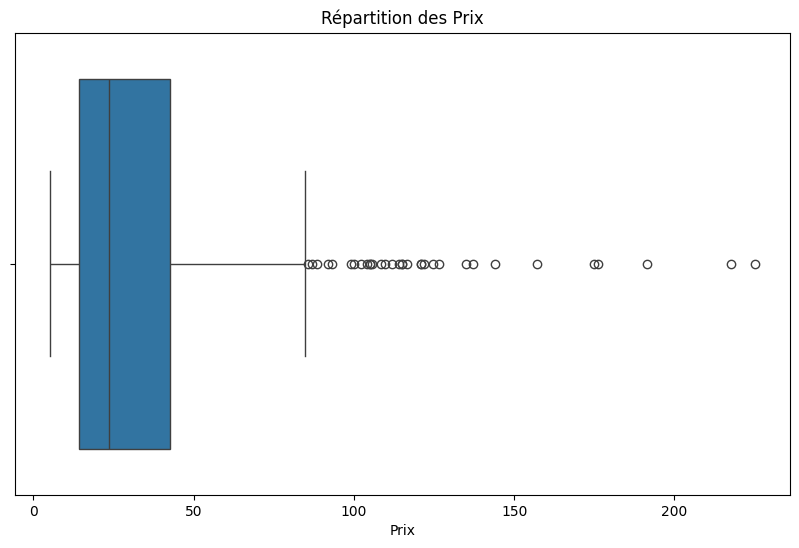

In [ ]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas

import seaborn as sns
import matplotlib.pyplot as plt

# Créer une boîte à moustaches avec seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='price', data=df_merge)

# Ajouter un titre et des labels
plt.title('Répartition des Prix')
plt.xlabel('Prix')

# Afficher le graphique
plt.show()


In [ ]:
#Autre méthode avec plotly express

import plotly.express as px

# Créer une boîte à moustaches avec Plotly Express
fig = px.box(df_merge, x='price', title='Répartition des Prix')

# Afficher le graphique
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [ ]:
#Calculer la moyenne du prix
print("La moyenne du prix est :", df_merge['price'].mean())
#Calculer l'écart-type du prix
print("L'écart-type du prix est :", df_merge['price'].std())
#Calculer le Z-score

print(df_merge['price'].dtype)

from scipy.stats import zscore

# Calculer le Z-score du prix
df_merge['z_score_price'] = zscore(df_merge['price'])

# Afficher la DataFrame avec le Z-score ajouté
print(df_merge[['price', 'z_score_price']])

La moyenne du prix est : 32.736541143654115
L'écart-type du prix est : 28.132911863492644
float64
     price  z_score_price
0     24.2            NaN
1     34.3            NaN
2     20.8            NaN
3     14.1            NaN
4     46.0            NaN
..     ...            ...
732   19.0            NaN
733    8.4            NaN
734   27.5            NaN
735   69.0            NaN
736   16.3            NaN

[737 rows x 2 columns]


In [ ]:
#Quel est le seuil prix dont z-score est supérieur à 3?


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [ ]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
df_merge.describe()

,product_id,onsale_web,price,stock_quantity,total_sales,post_author,post_date,post_date_gmt,post_modified,post_modified_gmt,Millésime,z_score_price
count,737.000000,717.0,717.000000,717.000000,712.000000,712.0,712,712,712,712,541.000000,0.0
mean,5041.335142,1.0,32.736541,28.626220,4.009831,2.0,2018-08-21 08:33:08.113764096,2018-08-21 07:04:29.012640512,2020-06-21 22:02:37.813202432,2020-06-21 20:09:07.139044864,2017.942699,NaN
min,3847.000000,1.0,5.200000,0.000000,0.000000,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,2018-02-20 15:19:23,2018-02-20 14:19:23,2003.000000,NaN
25%,4288.000000,1.0,14.100000,2.000000,0.000000,2.0,2018-02-27 14:12:06.750000128,2018-02-27 13:12:06.750000128,2020-06-19 10:07:33,2020-06-19 08:07:33,2017.000000,NaN
50%,4863.000000,1.0,23.700000,12.000000,1.000000,2.0,2018-04-19 14:44:46.500000,2018-04-19 12:44:46.500000,2020-08-04 09:30:10.500000,2020-08-04 07:30:10.500000,2019.000000,NaN
75%,5712.000000,1.0,42.600000,35.000000,4.000000,2.0,2019-01-31 14:29:05,2019-01-31 13:29:05,2020-08-25 10:42:32,2020-08-25 08:42:32,2020.000000,NaN
max,7338.000000,1.0,225.000000,578.000000,96.000000,2.0,2020-07-20 11:00:00,2020-07-20 09:00:00,2020-08-27 18:55:03,2020-08-27 16:55:03,2021.000000,NaN
std,788.871168,0.0,28.132912,47.947886,8.525871,0.0,NaN,NaN,NaN,NaN,2.425644,NaN


In [ ]:
#Définissez un seuil pour les articles "outliers" en prix
# Calculer Q1, Q3 et IQR
#import numpy as np
#1 = np.percentile(df_merge['price'], 25)
#Q3 = np.percentile(df_merge['price'], 75)
Q1 = 14.1
Q3 = 42.6

IQR = Q3 - Q1

# Définir les seuils pour les outliers
seuil_inferieur = Q1 - 1.5 * IQR
seuil_superieur = Q3 + 1.5 * IQR

print('Seuil inférieur outliers : ',seuil_inferieur)

print('Seuil supérieur outliers : ',seuil_superieur)

Seuil inférieur outliers :  -28.65
Seuil supérieur outliers :  85.35


In [ ]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"

# Identifier les outliers
outliers = df_merge[(df_merge['price'] < seuil_inferieur) | (df_merge['price'] > seuil_superieur)]

# Nombre d'articles outliers
nombre_outliers = len(outliers)

# Nombre total d'articles dans le catalogue
nombre_total_articles = len(df_merge)

# Proportion d'outliers par rapport à l'ensemble du catalogue
proportion_outliers = nombre_outliers / nombre_total_articles

# Afficher les résultats
print("Nombre d'articles outliers :", nombre_outliers)
print("Nombre total d'articles dans le catalogue :", nombre_total_articles)
print("Proportion d'outliers par rapport à l'ensemble du catalogue :", proportion_outliers)

Nombre d'articles outliers : 33
Nombre total d'articles dans le catalogue : 737
Proportion d'outliers par rapport à l'ensemble du catalogue : 0.04477611940298507


In [ ]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?
outliers.head()

# ce sont pas des outliers car le prix de vin peut aller très cher. 

,product_id,onsale_web,price,stock_quantity,sku,_merge,total_sales,tax_status,post_author,post_date,...,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets,z_score_price
63,4115,1.0,100.0,11.0,15382,both,0.0,NaN,2.0,2018-02-13 11:08:45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,4132,1.0,88.4,5.0,11668,both,0.0,NaN,2.0,2018-02-13 11:43:55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199,4352,1.0,225.0,0.0,15940,both,5.0,NaN,2.0,2018-03-02 10:30:04,...,Champagne,Blanc,"30% Chardonnay, 70% Pinot Noir",NaN,10 ans et +,75cl,"12,50%",10°C,"Apéritif, Crustacés, Desserts, Poissons",NaN
201,4355,1.0,126.5,2.0,12589,both,11.0,NaN,2.0,2018-03-02 10:46:10,...,Champagne,Blanc,Pinot Noir,NaN,5-10 ans,75cl,"12,50%",10°C,"Apéritif, Desserts, Tartes aux fruits",NaN
205,4359,1.0,85.6,0.0,13853,both,1.0,NaN,2.0,2018-03-02 11:11:48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA et des quantités vendues</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [ ]:
##############################
# Calculer le CA su site web #
##############################

#Créez une colonne calculant le CA par article
df_merge['CA'] = df_merge['price'] * df_merge['total_sales']

#Calculez la somme de la colonne "ca_par_article"
df_merge['CA'].sum()
#Ce résultat correspond au chiffre d'affaire du site web
print("chiffre d'affaire du site web : ", df_merge['CA'].sum())

chiffre d'affaire du site web :  70318.6


In [ ]:
###############################
# Palmares des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
df_merge.sort_values(by='CA', ascending=False, inplace=True)
#Réinitialiser l'index du dataset par un reset_index
df_merge.reset_index(drop=True)
#Afficher les 20 premier articles en CA
print(df_merge.head(20))
#Graphique en barre des 20 premiers articles avec plotly express
fig = px.bar(df_merge.head(20), x='post_name', y='CA', title='Top 20 des articles par chiffre d\'affaires')

# Afficher le graphique
fig.show()

     product_id  onsale_web  price  stock_quantity    sku _merge  total_sales  \
194        4334         1.0   49.0             0.0   7818   both         96.0   
71         4144         1.0   49.0            11.0   1662   both         87.0   
218        4402         1.0  176.0             8.0   3510   both         13.0   
70         4142         1.0   53.0             8.0  11641   both         30.0   
69         4141         1.0   39.0             1.0    304   both         40.0   
201        4355         1.0  126.5             2.0  12589   both         11.0   
199        4352         1.0  225.0             0.0  15940   both          5.0   
79         4153         1.0   29.0             0.0  16237   both         36.0   
675        6206         1.0   25.2           120.0  16580   both         41.0   
30         4068         1.0   16.6           157.0  16416   both         62.0   
17         4053         1.0   44.3            16.0  13127   both         23.0   
253        4596         1.0 

In [ ]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
df_merge['%CA'] = df_merge['CA']/df_merge['CA'].sum()
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merge['%CA cumulé'] = df_merge['%CA'].cumsum()
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
CA_80 = df_merge[df_merge['%CA cumulé'] <= 0.8]
print("le nombre d'articles représentant 80% du CA est ",len(CA_80))
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
print("La proportion que représentent ce groupe d'articles dans le catalogue entier du site web est ",len(CA_80)/len(df_merge))


le nombre d'articles représentant 80% du CA est  130
La proportion que représentent ce groupe d'articles dans le catalogue entier du site web est  0.17639077340569878


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [ ]:
###############################
# Palmares des articles en quantité #
###############################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
df_merge.sort_values(by='total_sales', ascending=False, inplace=True)
#Réinitialiser l'index du dataset par un reset_index
df_merge.reset_index(drop=True)
#Afficher les 20 premier articles en quantité
print(df_merge.head(20))
#Graphique en barre des 20 premiers articles avec plotly express
fig = px.bar(df_merge.head(20), x='post_name', y='total_sales', title='Top 20 des articles par vente')

# Afficher le graphique
fig.show()

     product_id  onsale_web  price  stock_quantity    sku _merge  total_sales  \
194        4334         1.0   49.0             0.0   7818   both         96.0   
71         4144         1.0   49.0            11.0   1662   both         87.0   
30         4068         1.0   16.6           157.0  16416   both         62.0   
119        4200         1.0    5.8           190.0  16295   both         46.0   
97         4172         1.0    5.7           167.0  16210   both         43.0   
109        4187         1.0   13.3            90.0  16189   both         42.0   
675        6206         1.0   25.2           120.0  16580   both         41.0   
69         4141         1.0   39.0             1.0    304   both         40.0   
649        6047         1.0   10.9            46.0  16264   both         38.0   
349        4729         1.0    8.6           151.0     38   both         38.0   
676        6207         1.0   25.2           363.0  16077   both         37.0   
79         4153         1.0 

In [ ]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
df_merge['%total_sales'] = df_merge['total_sales']/df_merge['total_sales'].sum()
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merge['%total_sales cumulé'] = df_merge['%total_sales'].cumsum()
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
sales_80 = df_merge[df_merge['%total_sales cumulé'] <= 0.8]
print("le nombre d'articles représentant 80% du CA est ",len(sales_80))
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
print("La proportion que représentent ce groupe d'articles dans le catalogue entier du site web est ",len(sales_80)/len(df_merge))



le nombre d'articles représentant 80% du CA est  150
La proportion que représentent ce groupe d'articles dans le catalogue entier du site web est  0.20352781546811397


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [ ]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.  
chemin_fichier_excel = r'C:\Users\yenbh\OneDrive\Desktop\Data Analyst\Supply Chain Open classroom\Projet 6 Optimisez la gestion du stock d’une boutique en nettoyant ses données\df_merge.xlsx'

# Sauvegarder le DataFrame df_merge dans un fichier Excel
df_merge.to_excel(chemin_fichier_excel, index=False)

print("Le DataFrame a été sauvegardé dans le fichier Excel :", chemin_fichier_excel)

Le DataFrame a été sauvegardé dans le fichier Excel : C:\Users\yenbh\OneDrive\Desktop\Data Analyst\Supply Chain Open classroom\Projet 6 Optimisez la gestion du stock d’une boutique en nettoyant ses données\df_merge.xlsx
